In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import glob
import sys

sys.path.append("../")
from utils_new import gen_bursts, run_search, analyse_and_plot, fit_and_plot
from utils import *
from plotting import set_size

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# FRB121102 with some nominal parameters
bursts, name = gen_bursts(
    mu_params=[1650, 250],  # sigma_params=[450, 200],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=50000,
    alpha=-1.5,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

# bursts, name = gen_bursts(mu_params=[1650, 200], #sigma_params=[450, 200],
#                           sigma_params=[200, 200],
#                           mu_dist='norm', sigma_dist='norm',
#                           N=40000, alpha=-1.5,
#                           E_min_log=37, E_max_log=40, save=False)

# bursts, name = gen_bursts(mu_params=[900, 1800],
#                           sigma_params=[50, 200],
#                           mu_dist='uniform', sigma_dist='uniform',
#                           N=10000, alpha=-1.8,
#                           E_min_log=36.5, E_max_log=39.5, save=False)

<IPython.core.display.Javascript object>

In [3]:
def fit_and_plot(
    E,
    ax,
    plot_orig=True,
    plot_fit=True,
    single_law=True,
    double_law=False,
    color="k",
    label="label",
):
    const = 10 ** 34
    Es = np.sort(E) / const
    Ns = np.linspace(len(Es) - 1, 0, len(Es))

    if plot_orig:
        ax.scatter(np.sort(E), np.log10(Ns), c=color, marker=".")

    if plot_fit:
        ret = {}
        if single_law:
            scale, slope = fit_single_power_law(Ns, Es)
            x = np.sort(E)
            y = np.log10(single_power_law(Es, scale, slope).astype("float"))
            ax.plot(x, y, c=color, label=f"{label}={slope:.3f}")

            ret["single"] = {"scale": scale, "slope": slope}

        if double_law:
            vals = fit_double_power_law(Ns, Es)
            scale, slope1, slope2, break_e = vals
            x = np.sort(E)
            y = np.log10(
                double_power_law(Es, scale, break_e, slope1, slope2).astype("float")
            )

            ax.axvline(x=break_e * const, linestyle="--", c=color)

            ax.plot(
                x,
                y,
                linestyle="--",
                c=color,
                label=f"{label}={slope1:.3f}, {slope2:.3f}",
            )
            # , break={break_e:.3f}')

            ax.set_xscale("log")
            ret["double"] = {
                "scale": scale,
                "slope1": slope1,
                "slope2": slope2,
                "break_e": break_e * const,
            }

        return ret
    else:
        return 0

<IPython.core.display.Javascript object>

In [4]:
# very sensitive (> FAST)
# moderate ( ~GBT)
# less (Parkes, etc)
thresholds = [0.02, 0.02 * 5, 0.02 * 10 * 2]

<IPython.core.display.Javascript object>

0.02
44348 11903


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.1
44348 2899


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.4
44348 783


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


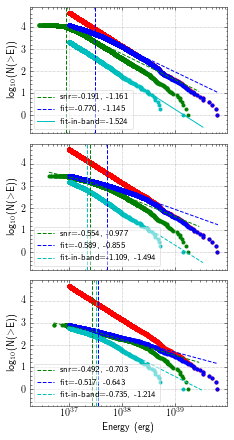

<IPython.core.display.Javascript object>

In [5]:
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        3,
        1,
        figsize=set_size(width="half", subplots=(3, 1)),
        sharey=True,
        sharex=True,
    )
    # fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
    for i, th in enumerate(thresholds):
        ax = axes[i]
        print(th)
        detected, detected_in_band_df, Es = run_search(
            bursts,
            fstart=974,
            fend=1774,
            fluence_threshold=th,
            in_band_sig=3,
            ret="all",
            distance=972,
        )
        print(len(bursts), len(detected))
        #     analyse_and_plot(bursts, detected, Es)
        original_E = Es["original_E"]
        detected_snr_E = Es["detected_snr_E"]
        detected_fit_E = Es["detected_fit_E"]
        detected_in_band_E = Es["detected_in_band_E"]

        #     plt.figure(figsize=(10, 6))

        fit_vals = {}
        fit_vals["orig"] = fit_and_plot(
            original_E,
            ax,
            plot_fit=False,
            plot_orig=True,
            single_law=False,
            double_law=False,
            color="r",
            #             label="Injected",
        )

        fit_vals["detected-snr"] = fit_and_plot(
            detected_snr_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="g",
            label="snr",
        )

        if i == 0:
            double_law = False
        else:
            double_law = True

        fit_vals["detected-fit"] = fit_and_plot(
            detected_fit_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=False,
            double_law=True,
            color="b",
            label="fit",
        )

        if i == 1 or i == 2:
            single_law = False
        else:
            single_law = True

        fit_vals["detected-in-band"] = fit_and_plot(
            detected_in_band_E,
            ax,
            plot_fit=True,
            plot_orig=True,
            single_law=single_law,
            double_law=double_law,
            color="c",
            label="fit-in-band",
        )
        legend = ax.legend(fontsize="small")  # loc="lower left")
        legend.get_frame().set_alpha(0.5)
        if i == 2:
            ax.set_xlabel("Energy (erg)")
        ax.set_ylabel(r"log$_{10}$(N($>$E))")
    #         labels = [str(10 ** item._y) for item in ax.get_yticklabels()]
    #         ax.set_yticklabels(labels)
    #         ax.set_title(f"Fluence={th}Jyms")
    plt.tight_layout()
    #     plt.savefig("power_laws.pdf", bbox_inches="tight", dpi=300)
    plt.savefig("power_laws.png", bbox_inches="tight", dpi=300)